<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/PredictingHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import một số thư viện

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data House Prices: Advanced Regression Techniques

Tải dữ liệu trainingset và testset ở github bằng lệnh !wget

In [94]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2020-08-14 09:07:46--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv.3’

house_prices_train. 100%[===================>] 449.88K  --.-KB/s    in 0.08s   

2020-08-14 09:07:46 (5.80 MB/s) - ‘house_prices_train.csv.3’ saved [460676/460676]

--2020-08-14 09:07:47--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP reques

Đọc dữ liệu bằng pandas 

In [95]:
df_train=pd.read_csv('house_prices_train.csv')
df_test=pd.read_csv('house_prices_test.csv')

In [96]:
df_train.shape

(1460, 81)

In [97]:
df_test.shape

(1459, 80)

Khám phá dữ liệu

In [98]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [99]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

Nhìn sơ qua về bộ dữ liệu train thì thấy có 79 feature có thể ảnh hưởng đến giá nhà và bộ dữ liệu có nhiều missing data.

Biểu diễn dữ liệu giá nhà bằng biểu đồ

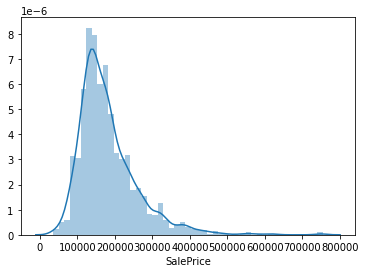

In [100]:
import seaborn as sns
sns.distplot(df_train['SalePrice']);

Qua biểu đồ về giá nhà thì thấy được hầu hết mật độ dều tập trung vào khoảng 100k - 200k USD

# Phân tích độ ảnh hưởng của các feature

Vì có quá nhiều feature và thực tế thì các feature trong việc quyết định giá nhà lại có mức độ ảnh hưởng khác nhau vì thế ta nên chọn 10 feature quan trọng nhất trong giá nhà để tiến hành tinh chỉnh dữ liệu

In [101]:
k=10 #số lượng biến đánh giá
corrmat=df_train.corr()
#hàm corr để tính toán hệ số tương quan giữa các feature của dataframe hay độ ảnh hưởng lẫn nhau 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice']
#.nlargest: chọn ra 10 feature có độ ảnh hưởng cao nhất đến giá nhà 
cols

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Vẽ biểu đồ mối quan hệ của các feature được chọn ra ở trên với giá nhà để xem xét các điểm dữ liệu có thể gây nhiễu

sns.jointplot: biểu đồ thể hiện quan hệ 2 biến, kind=reg: mô hình hồi quy

Biểu đồ giữa OverallQual và SalePrice

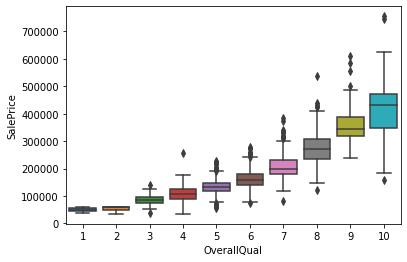

In [102]:
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])

Chất lượng càng cao giá nhà càng đắt là hợp lý => không có gì thay đổi

Biểu đồ giữa Living Area và SalePrice


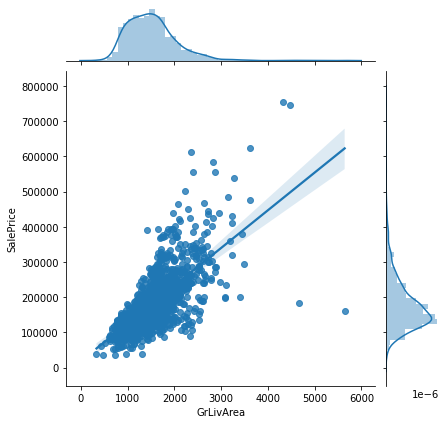

In [103]:
sns.jointplot(x=df_train['GrLivArea'],y=df_train['SalePrice'],kind='reg')

Biểu đồ chỉ ra xu hướng khu vực sống càng tốt thì giá tiền càng cao, tuy nhiên có 2 điểm dữ liệu ở góc dưới phải là ngoại lệ và có thể gây nhiễu. 

Tiến hành loại bỏ 2 điểm dữ liệu nhiễu. Nhìn trên biểu đồ thì ta thấy 2 điểm này có GrLivArea >4000 và SalePrice<30000

In [104]:
df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,...,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Sử dụng hàm drop để loại bỏ 2 samples này trong bộ train và reset_index sau khi loại bỏ

In [105]:
df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)

Biểu đồ quan hệ giữa GarageCars và SalePrice

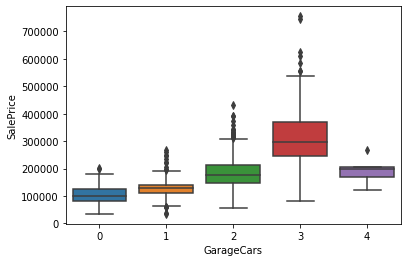

In [106]:
sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

Ta thấy trên biểu đồ dữ liệu rằng các samples có garage chứa 4 ô tô thì lại làm giảm giá nhà là không hợp lý => loại bỏ

In [107]:
df_train =df_train.drop(df_train[(df_train['GarageCars']>3) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)

Biểu diễn quan hệ giữa GarageArea và SalePrice bằng biểu đồ hồi quy

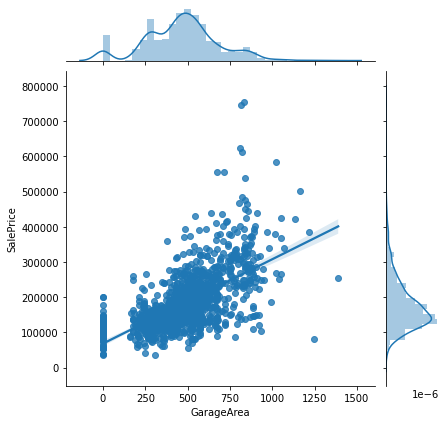

In [108]:
sns.jointplot(x=df_train['GarageArea'], y=df_train['SalePrice'], kind='reg')

Ta thấy xu hướng rằng GarageArea càng lớn thì giá nhà càng cao tuy nhiên có 2 điểm dữ liệu ở góc dưới phải là trường hợp ngoại lệ có thể gây nhiễu => loại bỏ

In [109]:
df_train =df_train.drop(df_train[(df_train['GarageArea']>1200)&(df_train['SalePrice']<300000)].index).reset_index(drop=True)

Biểu đồ hồi quy giữa Basement Area và SalePrice

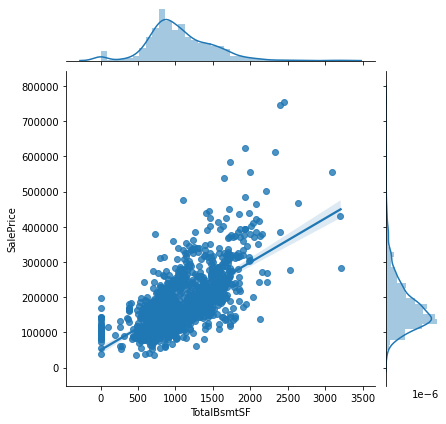

In [110]:
sns.jointplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'], kind='reg')

Có 1 điểm khá là không hợp lý tuy nhiên có thể chấp nhận được

Biểu đồ hồi quy giữa FirstFloorArea và SalesPrice

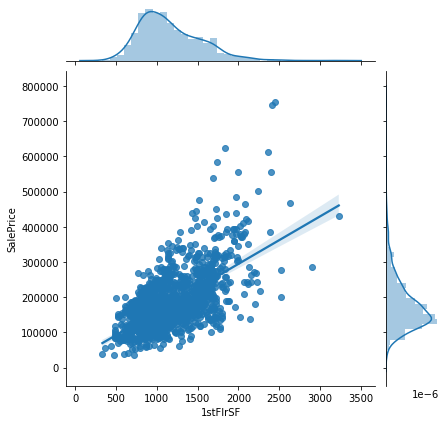

In [111]:
sns.jointplot(x=df_train['1stFlrSF'], y=df_train['SalePrice'], kind='reg')

Có thể chấp nhận được

Biểu đồ giữa TotalRoom và SalePrice

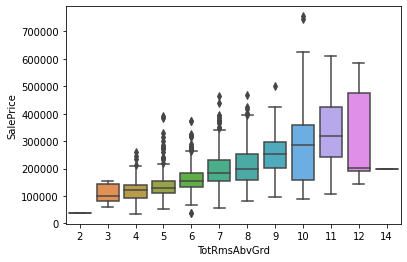

In [112]:
sns.boxplot(x=df_train['TotRmsAbvGrd'],y=df_train['SalePrice'])

Ta thấy rằng số phòng lớn hơn 10 thì giá nhà lại có xu hướng giảm đi tuy nhiên lại có xu hướng giảm dần cho nên có thể là được giảm giá => giữ nguyên

Biểu đồ quan hệ giữa năm xây dựng và giá nhà

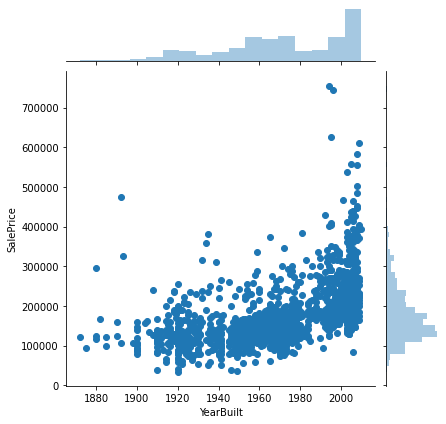

In [113]:
sns.jointplot(x=df_train['YearBuilt'],y=df_train['SalePrice'])

Xu hướng: càng mới thì giá nhà càng cao là hợp lý => Giữ nguyên

# Xử lý dữ liệu bị thiếu và làm sạch dữ liệu

Tách feature SalePrice ra khỏi bộ train vì bộ test không có SalePrice

In [114]:
y_train=df_train.SalePrice.values
df_train=df_train.drop(labels='SalePrice',axis=1)

Kết nối 2 bộ dữ liệu test và train để xử lý bằng pd.concat

In [115]:
all_data=pd.concat([df_train,df_test],ignore_index=True)
all_data.shape

(2910, 80)

Tìm tỉ lệ thiếu dataset của các feature

In [116]:
#tính tỉ lệ thiếu dữ liệu của mỗi feature 
all_data_na=(all_data.isnull().sum()/len(all_data))*100 
#loại bỏ các feature không bị thiếu dữ liệu
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
#trực quan hóa tỉ lệ thiếu dữ liệu của các feature
missing_data=pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
PoolQC,99.690722
MiscFeature,96.426117
Alley,93.230241
Fence,80.412371
FireplaceQu,48.659794
LotFrontage,16.666667
GarageFinish,5.463918
GarageYrBlt,5.463918
GarageQual,5.463918
GarageCond,5.463918


Điền dữ liệu bị thiếu

  - PoolQC : data description says NA means "No Pool"
  -MiscFeature : data description says NA means "no misc feature"
  -Alley : data description says NA means "no alley access"
  -Fence : data description says NA means "no fence"
  -FireplaceQu : data description says NA means "no fireplace"
  -LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
  -GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
  -GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0.
  -BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
  -BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there isn't a basement.
  -MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
  -MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
  -Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
  -Functional : data description says NA means typical.
  -Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
  -KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
  -Exterior1st and Exterior2nd : Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
  -SaleType : Fill in again with most frequent which is "WD"
MSSubClass : Na most likely means No building class. We can replace missing values with None

In [117]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#PoolQC: dữ liệu là NA nghĩa là k có hồ bơi
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Kiểm tra xem còn dữ liêu nào bị thiếu không

In [118]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


# Feature Engineering

Có một số feature có giá trị là số học nhưng không quyết định độ lớn bé như: kiểu nhà (MSSubClass) => cần chuyển đổi feature này về dạng string sau đó thực hiện LabelEncoding

In [119]:
#MSSubClass =The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [162]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','Foundation','BsmtExposure','Heating','Electrical','FireplaceQu','GarageType','PavedDrive',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','MiscFeature','SaleType','SaleCondition',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','MSZoning','LandContour','LotConfig','SaleType','SaleCondition','Neighborhood','Condition2','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',)
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

vì có thể thay thế 3 feature TotalBsmtSF,1stFlrSF,2ndFlrsf thành TotalSF => tiến hành cắt giảm feature để tránh xây dựng model quá phức tạp

In [163]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Nhìn vào biểu đồ giá nhà ở trên thì ta thấy biểu đồ dữ liệucó xu hướng lệch phải hay bộ dữ liệu này chưa phân phối chuẩn => sử dụng phép log để cải thiện điều này

In [164]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)

Tách lại bộ train test từ bộ all_data sau khi feature engineering

In [165]:
n_train=df_train.shape[0]
train=all_data[:n_train]
test=all_data[n_train:]

# Modeling và Dự đoán

In [168]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(train,y_train)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(train)

Slope:  [-7.49625940e-09  4.20695952e-06 -1.36923749e-05  5.96548727e-07
  2.82914846e-09  2.42680905e-04  3.00627912e-05 -3.87728674e-06
 -1.07658773e-05 -2.44896027e-06 -6.54364324e-06 -4.38511516e-07
  2.85807511e-06 -2.67138803e-05 -5.14264747e-06 -2.26551564e-06
  7.14091732e-05  5.29851951e-05  2.17572800e-06  9.15363638e-07
  3.51496376e-06 -6.83320371e-06 -4.59233052e-06  4.47482880e-06
  1.69756260e-05  1.17017181e-08 -7.97983081e-06  1.54478288e-05
  1.72862771e-05 -9.91715717e-06  4.23899443e-06 -2.33978392e-06
 -2.48949937e-06  4.41439364e-08  2.84057916e-06  2.25072612e-08
 -3.66515120e-08  2.99996856e-08 -4.04438884e-06 -1.06088337e-05
  1.01825766e-04 -4.05558359e-07  7.57331681e-08  1.57994991e-08
  4.14504144e-08  1.32983083e-07  3.71839417e-05  1.86298472e-05
  3.00240280e-05  2.72797899e-05 -3.08973315e-06 -7.75926970e-05
 -1.82256942e-05  5.90938776e-06  2.17321462e-05  3.41697893e-05
 -4.36657521e-06 -1.20270659e-06  2.95922042e-08 -2.57018258e-06
  2.21727907e-05 

In [170]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_fit)
mse

1.9825392334296673e-08